***TURBINE NEURAL NETWORK:***

In [167]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import joblib
import plotly.offline as pyo
import plotly.io as pio

RMSE: 14.65, R2: 0.98, MAE: 10.49


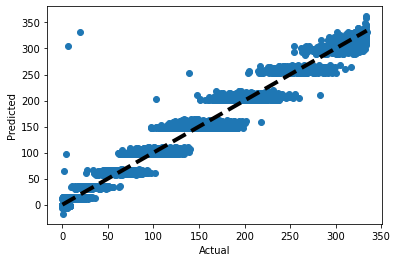

In [161]:
TP = pd.read_csv("../DATA/turbine_Performance_prediction_dataframe.csv",)

#Convert the datetime column to the index of the DataFrame:
TP['Time'] = pd.to_datetime(TP['Time'])
TP.set_index('Time', inplace=True)

#Drop columns not needed for model prediction:
TP_MODEL = TP.drop(columns=['Unnamed: 0'])

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(TP_MODEL[['WindSpeed (m/s)', 'Wind Direction (°)']], TP_MODEL['Total Active Power (kWh)'], test_size=0.2, random_state=42)

# Create an instance of the MLPRegressor class:
model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', learning_rate='adaptive', max_iter=500)

# Fit the model to the training data:
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data:
y_pred = model.predict(X_test)

# Save the trained model to a file
#joblib.dump(model, 'trained_model.pkl')

# Calculate the RMSE (root mean squared error) and R2 (R-squared) values between the predicted and actual values:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}')

# Plot the predicted values against the actual values:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [162]:
TP_MODEL

WindSpeed (m/s)  Wind Direction (°)  \
Time                                                       
2017-01-01 00:00:00                8                  97   
2017-01-01 00:10:00                7                  97   
2017-01-01 00:20:00                8                 109   
2017-01-01 00:30:00                7                  89   
2017-01-01 00:40:00                7                 105   
...                              ...                 ...   
2017-12-31 23:10:00                6                 318   
2017-12-31 23:20:00                5                 319   
2017-12-31 23:30:00                5                 327   
2017-12-31 23:40:00                5                 328   
2017-12-31 23:50:00                6                 334   

                     Total Active Power (kWh)  
Time                                           
2017-01-01 00:00:00                   143.338  
2017-01-01 00:10:00                    84.757  
2017-01-01 00:20:00                   123.800  
2017-01-01 00:30:00                   100.523  
2017-01-01 00:40:00                   101.442  
...                                       ...  
2017-12-31 23:10:00                    65.411  
2017-12-31 23:20:00                    43.648  
2017-12-31 23:30:00                    31.904  
2017-12-31 23:40:00                    47.945  
2017-12-31 23:50:00                    50.107  

[39816 rows x 3 columns]

***ENERGY FORECASTING:***

In [237]:
#Turbine Power Prediction
forecast_data = pd.read_csv('WindFloat_Atlantic_Turbine_Conditions.csv', index_col='Time', parse_dates=True)
forecast_data

WindSpeed (m/s)  Wind Direction (°)
Time                                                    
2023-03-17 11:00:00               10                 236
2023-03-17 17:00:00                8                 239
2023-03-17 23:00:00                8                 243
2023-03-18 05:00:00                8                 240
2023-18-10 11:00:00               13                 212
2023-03-18 17:00:00               14                 315
2023-03-18 23:00:00               11                 321
2023-03-19 05:00:00                9                 322
2023-03-19 11:00:00                7                 326
2023-03-19 17:00:00                4                 327
2023-03-19 23:00:00                1                 313
2023-03-20 05:00:00                3                 151
2023-03-20 11:00:00                7                 176
2023-03-20 17:00:00                8                 229
2023-03-20 23:00:00                9                 253
2023-03-21 05:00:00                8                 308
2023-03-21 11:00:00                5                 300
2023-03-21 17:00:00                4                 272
2023-03-21 23:00:00                5                 239
2023-03-22 05:00:00                4                 307
2023-03-22 11:00:00                3                 329

In [238]:



# Use the model to predict the new data
X_new = forecast_data[['WindSpeed (m/s)', 'Wind Direction (°)']]
y_new = list(model.predict(X_new))


In [239]:
forecast_data['Predicted Total Active Power (kWh)']=y_new

In [240]:
forecast_data

WindSpeed (m/s)  Wind Direction (°)  \
Time                                                       
2023-03-17 11:00:00               10                 236   
2023-03-17 17:00:00                8                 239   
2023-03-17 23:00:00                8                 243   
2023-03-18 05:00:00                8                 240   
2023-18-10 11:00:00               13                 212   
2023-03-18 17:00:00               14                 315   
2023-03-18 23:00:00               11                 321   
2023-03-19 05:00:00                9                 322   
2023-03-19 11:00:00                7                 326   
2023-03-19 17:00:00                4                 327   
2023-03-19 23:00:00                1                 313   
2023-03-20 05:00:00                3                 151   
2023-03-20 11:00:00                7                 176   
2023-03-20 17:00:00                8                 229   
2023-03-20 23:00:00                9                 253   
2023-03-21 05:00:00                8                 308   
2023-03-21 11:00:00                5                 300   
2023-03-21 17:00:00                4                 272   
2023-03-21 23:00:00                5                 239   
2023-03-22 05:00:00                4                 307   
2023-03-22 11:00:00                3                 329   

                     Predicted Total Active Power (kWh)  
Time                                                     
2023-03-17 11:00:00                          263.746838  
2023-03-17 17:00:00                          156.084923  
2023-03-17 23:00:00                          156.384220  
2023-03-18 05:00:00                          156.159747  
2023-18-10 11:00:00                          315.549115  
2023-03-18 17:00:00                          353.917885  
2023-03-18 23:00:00                          304.638939  
2023-03-19 05:00:00                          216.778500  
2023-03-19 11:00:00                          108.155701  
2023-03-19 17:00:00                           13.288821  
2023-03-19 23:00:00                          -28.873425  
2023-03-20 05:00:00                           -3.553031  
2023-03-20 11:00:00                          100.267820  
2023-03-20 17:00:00                          155.336680  
2023-03-20 23:00:00                          211.615624  
2023-03-21 05:00:00                          161.247799  
2023-03-21 11:00:00                           34.933816  
2023-03-21 17:00:00                           12.406145  
2023-03-21 23:00:00                           33.988287  
2023-03-22 05:00:00                           12.967848  
2023-03-22 11:00:00                           -0.588702

In [242]:
#clean the predicted power data for gis:
#forecast_data.drop(columns=['WindSpeed (m/s)', 'Wind Direction (°)'], inplace=True)
forecast_data = forecast_data.assign(lat=41.470504, lon=-10.414340)
forecast_data

Predicted Total Active Power (kWh)        lat       lon
Time                                                                        
2023-03-17 11:00:00                          263.746838  41.470504 -10.41434
2023-03-17 17:00:00                          156.084923  41.470504 -10.41434
2023-03-17 23:00:00                          156.384220  41.470504 -10.41434
2023-03-18 05:00:00                          156.159747  41.470504 -10.41434
2023-18-10 11:00:00                          315.549115  41.470504 -10.41434
2023-03-18 17:00:00                          353.917885  41.470504 -10.41434
2023-03-18 23:00:00                          304.638939  41.470504 -10.41434
2023-03-19 05:00:00                          216.778500  41.470504 -10.41434
2023-03-19 11:00:00                          108.155701  41.470504 -10.41434
2023-03-19 17:00:00                           13.288821  41.470504 -10.41434
2023-03-19 23:00:00                          -28.873425  41.470504 -10.41434
2023-03-20 05:00:00                           -3.553031  41.470504 -10.41434
2023-03-20 11:00:00                          100.267820  41.470504 -10.41434
2023-03-20 17:00:00                          155.336680  41.470504 -10.41434
2023-03-20 23:00:00                          211.615624  41.470504 -10.41434
2023-03-21 05:00:00                          161.247799  41.470504 -10.41434
2023-03-21 11:00:00                           34.933816  41.470504 -10.41434
2023-03-21 17:00:00                           12.406145  41.470504 -10.41434
2023-03-21 23:00:00                           33.988287  41.470504 -10.41434
2023-03-22 05:00:00                           12.967848  41.470504 -10.41434
2023-03-22 11:00:00                           -0.588702  41.470504 -10.41434

In [243]:
#export: then move to GIS file
forecast_data.to_csv('FINAL WindFloat Atlantic Turbine Predicted Power.csv')

In [123]:
import plotly.express as px
import plotly.io as pio

In [131]:
TP_DATA = pd.read_csv('../DATA/turbine_Performance_prediction_dataframe.csv')
TP_DATA.drop(columns=['Unnamed: 0'], inplace=True)
TP_DATA['Time'] = pd.to_datetime(TP_DATA['Time'])
TP_DATA

Time  WindSpeed (m/s)  Wind Direction (°)  \
0     2017-01-01 00:00:00                8                  97   
1     2017-01-01 00:10:00                7                  97   
2     2017-01-01 00:20:00                8                 109   
3     2017-01-01 00:30:00                7                  89   
4     2017-01-01 00:40:00                7                 105   
...                   ...              ...                 ...   
39811 2017-12-31 23:10:00                6                 318   
39812 2017-12-31 23:20:00                5                 319   
39813 2017-12-31 23:30:00                5                 327   
39814 2017-12-31 23:40:00                5                 328   
39815 2017-12-31 23:50:00                6                 334   

       Total Active Power (kWh)  
0                       143.338  
1                        84.757  
2                       123.800  
3                       100.523  
4                       101.442  
...                         ...  
39811                    65.411  
39812                    43.648  
39813                    31.904  
39814                    47.945  
39815                    50.107  

[39816 rows x 4 columns]

In [171]:
# Convert the 'Time' column to a datetime type
TP_DATA['Time'] = pd.to_datetime(TP_DATA['Time'])

# Create the line plot
fig2 = px.line(TP_DATA, x='Time', y='Total Active Power (kWh)')
fig2.update_layout(title="WindFloat Atlantic Turbine Total Active Power (kWh)")
# Show the plot
fig2.show()

# Export the plot as an HTML file:
pyo.plot(fig2, filename='my_plot.html')

'my_plot.html'

In [164]:
TP_DATA['predicted'] = model.predict(TP_DATA[['WindSpeed (m/s)', 'Wind Direction (°)']])

# create a line plot with the original and predicted data
fig = px.line(TP_DATA, x='Time', y=['Total Active Power (kWh)', 'predicted'],
              labels={'variable': 'Power'},
              title='Original and Predicted Turbine Active Power (kWh)')
fig.update_yaxes(title_text='Total Active Power (kWh)')
fig.show()

In [168]:
# Export the plot as an HTML file:
pyo.plot(fig, filename='my_plot.html')

'my_plot.html'